0 [280 139] [164.61181651 124.78651221]The distawnce is 116.2602947023548The label is 0
1 [280 139] [264.79489894 171.62491674]The distawnce is 35.994170229868416The label is 1
2 [280 139] [306.34363731 135.8953206 ]The distawnce is 26.52595447665568The label is 1
3 [280 139] [323.95670958 178.31281463]The distawnce is 58.97194003280886The label is 1
4 [280 139] [288.38048385 189.41015421]The distawnce is 51.102017152320826The label is 0
5 [280 139] [229.48283511 174.17766472]The distawnce is 61.55852535332682The label is 0
6 [280 139] [317.7232358  186.97910252]The distawnce is 61.03307953763329The label is 1
7 [280 139] [240.35901199 153.03556765]The distawnce is 42.05240884499591The label is 0
8 [280 139] [298.74945267 126.11168346]The distawnce is 22.75193790998488The label is 1
9 [280 139] [312.43737225 176.65789466]The distawnce is 49.70211412715487The label is 1
10 [280 139] [204.29765748 170.2444328 ]The distawnce is 81.89663756229017The label is 0
11 [280 139] [341.95603111 18

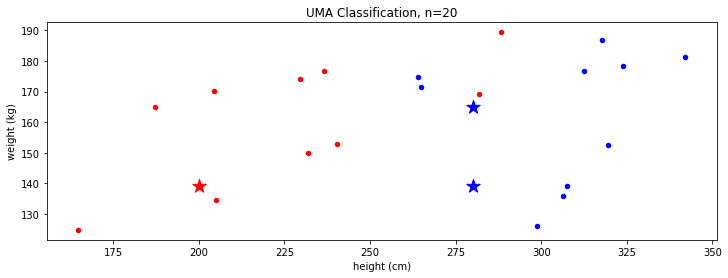

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from classification_clustering_data import * # Read data from external file

array_of_explanatory_variables_X = UMA_X # See classification_clustering_data.py for the contents of UMA_X
array_of_objective_variable_Y = UMA_Y # Same for UMA_Y
array_of_unknown_X = np.array([[280, 139],[200,139],[280,165]]) # Three UMAs with unknown gender
number_of_neighbors_to_see = 3

def calculate_euclidean_distance(height_weight1,height_weight2): # Calculate by Pythagorean theorem
    return np.sqrt((height_weight2[0]-height_weight1[0])**2 + (height_weight2[1]-height_weight1[1])**2)

def calculate_distances_to_all_known_data(array_of_unknown_data,array_of_known_data):
    array_to_return  = np.empty(0,float) # Create an empty array
    count = 0 # Remember what number of known data you are looking at
    
    for known_data_i in array_of_known_data:
        euclidean_distance=calculate_euclidean_distance(array_of_unknown_data,known_data_i)
        print(str(count)+" ",end="")
        print(array_of_unknown_data,known_data_i,end="")        
        print("The distawnce is "+str(euclidean_distance),end="")
        print("The label is " + str(array_of_objective_variable_Y[count]))
        array_to_return =np.append(array_to_return ,euclidean_distance)
        count += 1        
    return array_to_return 

def obtain_k_number_of_array_from_the_smaller_one(wk_array,k):
    sorted_array = wk_array.argsort() 
    return(sorted_array[0:k]) # from 0 to just before k (If k is 3, theses are 0, 1, 2)

########## First half of main processing (classification)  ########## 
array_of_predicted_labels = np.empty(0,bool) # Array of labels assigned to unknown data, initialized with empty

for unknown_data_i in range(len(array_of_unknown_X)): # Repeat for the number of unknown data
    # Distance from one unknown data to all known data
    array_of_distances_to_known_data = calculate_distances_to_all_known_data(array_of_unknown_X[unknown_data_i],array_of_explanatory_variables_X)   
    array_of_n_neighborhood_labels = np.empty(0,bool) # Array of majority labels
    
    for index in (obtain_k_number_of_array_from_the_smaller_one(array_of_distances_to_known_data,number_of_neighbors_to_see)):
        array_of_n_neighborhood_labels=np.append(array_of_n_neighborhood_labels,array_of_objective_variable_Y[index]) # Add to majority label array   
        
    majority_result =stats.mode(array_of_n_neighborhood_labels, axis=-1)[0]# Return value of stats.mode 0 is the mode   
    array_of_predicted_labels=np.append(array_of_predicted_labels,majority_result ) 

    print("From the smallest one "+str(number_of_neighbors_to_see),end="")
    print(obtain_k_number_of_array_from_the_smaller_one(array_of_distances_to_known_data,number_of_neighbors_to_see))
    print("Most decision ",end="")
    print(array_of_n_neighborhood_labels,end="") # Majority decision from this label array
    print(majority_result )    
        
classification_result=array_of_predicted_labels
print("Classification result of unknown data is "+str(classification_result))

##########The second half of the main processing (as shown in the figure)########## 
plt.figure(figsize=(12, 4))
plt.title("UMA Classification, n=20, k="+str(number_of_neighbors_to_see))
plt.title("UMA Classification, n=20")
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

#  Separate scatter colors by for statement for each group (known data)
colors=['red','blue'] # Red if classification result is 0, blue if classification result is 1
#
for i in range(2): # 2 because it is a binary classification
    scatter_plot_data=array_of_explanatory_variables_X[array_of_objective_variable_Y==i]
    plt.scatter(scatter_plot_data[:,0],scatter_plot_data[:,1],marker="o",c=colors[i],s=20)# Round size 20
    
# Overlay unknown data on scatter plot
#
for i in range(2): # 2 because it is a binary classification
    scatter_plot_data=array_of_unknown_X[classification_result==i]    
    #plt.scatter(scatter_plot_data[:,0],scatter_plot_data[:,1],marker="o",c=colors[i],s=20)# Round size 20
    plt.scatter(scatter_plot_data[:,0],scatter_plot_data[:,1],marker="*",c=colors[i],s=200)# 200 in star shape

plt.show()
